# Chapter 19 - Visualization and Statistics

At this point in the course, you have had some experience in getting and processing data, and exporting your results in a useful format. But after that stage, you also need to be able to *analyze* and *communicate* your results. Programming-wise, this is relatively easy. There are tons of great modules out there for doing statistics and making pretty graphs. The hard part is finding out what is the best way to communicate your findings.

**At the end of this chapter, you will be able to:**
- Have an overview of different kinds of visualizations and their purpose
- Communicate your results using visualizations, that is:
    - Make line plots.
    - Make bar and column charts.
    - Modify your plot to improve its visual appearance
- Compute two correlation metrics
- Perform exploratory data analysis, using both visual and statistical means.


**This requires that you already have (some) knowledge about:**
- Loading and manipulating data.

**If you want to learn more about these topics, you might find the following links useful:**
- Visualization blog: http://gravyanecdote.com/ 
- List of visualization blogs: https://flowingdata.com/2012/04/27/data-and-visualization-blogs-worth-following/

## 1. Introduction to visualization


### 1.1. What kind of visualization to choose

Visualization has two purposes: *aesthethics* and *informativeness*. We want to optimize for both. Luckily, they are somewhat independent, so that should work. Whether something will be a good visualization will be determined by: whether the creator makes the right **choices**, in the given **context**, for the given **audience** and **purpose**.

The following chart was made by ([Abela, 2006](http://extremepresentation.typepad.com/blog/2006/09/choosing_a_good.html)). It provides a first intuition on what kind of visualization to choose for your data. He also asks exactly the right question: **What do you want to show?** It is essential for any piece of communication to first consider: what is my main point? And after creating a visualization, to ask yourself: does this visualization indeed communicate what I want to communicate? (Ideally, also ask others: what kind of message am I conveying here?)

![chart_chooser](./images/chart_chooser.jpg)

It's also apt to call this a 'Thought-starter'. Not all visualizations in this diagram are frequently used; but also there are many great kinds of visualizations that aren't in this diagram. To get some more inspiration, check out the example galleries for these libraries:

* [D3.js](https://d3js.org/)
* [Seaborn](https://seaborn.github.io/examples/index.html)
* [Bokeh](http://bokeh.pydata.org/en/latest/docs/gallery.html)
* [Pandas](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)
* [Matplotlib](http://matplotlib.org/gallery.html)
* [Vis.js](http://visjs.org/index.html)

But before you get carried away, do realize that **sometimes all you need is a good table**. Tables are visualizations, too! For a good guide on how to make tables, read the first three pages of [the LaTeX booktabs package documentation](http://ctan.cs.uu.nl/macros/latex/contrib/booktabs/booktabs.pdf). Also see [this guide](https://www.behance.net/gallery/Designing-Effective-Data-Tables/885004) with some practical tips.

### 1.2. What kind of visualizations *not* to choose

As a warm-up exercise, take some time to browse [wtf-viz](http://viz.wtf/). For each of the examples, think about the following questions:

1. What is the author trying to convey here?
2. How did they try to achieve this?
3. What went wrong?
4. How could the visualization be improved? Or can you think of a better way to visualize this data?
5. What is the take-home message here for you?

For in-depth critiques of visualizations, see [Graphic Violence](https://graphicviolence.wordpress.com/). [Here](http://hanswisbrun.nl/tag/lieggrafiek/)'s a page in Dutch.



## 2. Visualization in Python

### 2.1. A little history

As you've seen in the [State of the tools](https://www.youtube.com/watch?v=5GlNDD7qbP4) video, `Matplotlib` is one of the core libraries for visualization. It's feature-rich, and there are many tutorials and examples showing you how to make nice graphs. It's also fairly clunky, however, and the default settings don't make for very nice graphs. But because `Matplotlib` is so powerful, no one wanted to throw the library away. So now there are several modules that provide wrapper functions around `Matplotlib`, so as to make it easier to use and produce nice-looking graphs.

* `Seaborn` is a visualization library that adds a lot of functionality and good-looking defaults to Matplotlib.
* `Pandas` is a data analysis library that provides plotting methods for its `dataframe` objects.

Behind the scenes, it's all still Matplotlib. So if you use any of these libraries to create a graph, and you want to customize the graph a little, it's usually a good idea to go through the `Matplotlib` documentation. Meanwhile, the developers of `Matplotlib` are still improving the library. If you have 20 minutes to spare, watch [this video](https://www.youtube.com/watch?v=xAoljeRJ3lU) on the new default colormap that will be used in Matplotlib 2.0. It's a nice talk that highlights the importance of color theory in creating visualizations.

With the web becoming more and more popular, there are now also several libraries in Python offering interactive visualizations using Javascript instead of Matplotlib. These are, among others:

* [Bokeh](http://bokeh.pydata.org/en/latest/)
* [NVD3](http://nvd3.org/)
* [Lightning](http://lightning-viz.org/)
* [MPLD3](http://mpld3.github.io/) (Also using Matplotlib)
* [Plotly](https://plot.ly/)
* [Vincent](https://vincent.readthedocs.io/en/latest/)

### 2.2. Getting started

This section shows you how to make plots using Matplotlib and Seaborn.

Run the cell below. This will load relevant packages to use visualizations inside the notebook.

In [3]:
# This is special Jupyter notebook syntax, enabling interactive plotting mode.
# In this mode, all plots are shown inside the notebook!
# If you are not using notebooks (e.g. in a standalone script), don't include this.
%matplotlib inline
import matplotlib.pyplot as plt

We can use a simple command from another package, Seaborn, to make all Matplotlib plots look prettier!
This import and the next command change the Matplotlib defaults for styling.

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

### 2.3. Common plots

**Example 1: Line plot** Let's create our first (line) plot:

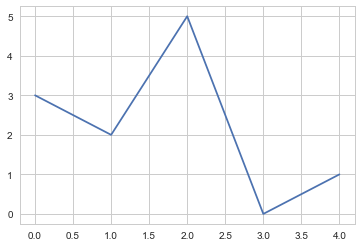

In [7]:
vals = [3,2,5,0,1]
plt.plot(vals)

If all went alright, you see a graph above this block. Try changing the numbers in the vals list to see how it affects the graph. Plotting is as simple as that!

**Example 2: Column chart** Now, let's try plotting some collected data. Suppose we did a survey to ask people for their favorite pizza. We store the result in a dictionary:

In [8]:
counts = {
    'Calzone': 63,
    'Quattro Stagioni': 43,
    'Hawaii': 40,
    'Pepperoni': 58,
    'Diavolo': 63,
    'Frutti di Mare': 32,
    'Margarita': 55,
    'Quattro Formaggi': 10,
}

This loop processes the dictionary into a format that's easy to send to matplotlib - a list of pizza names (for the labels on the bars) and a list of vote counts (for the actual graph.)

In [9]:
names = []
votes = []
# Split the dictionary of names->votes into two lists, one holding names and the other holding vote counts
for pizza in counts:
    names.append(pizza)
    votes.append(counts[pizza])

We create a range of indexes for the X values in the graph, one entry for each entry in the "counts" dictionary (ie len(counts)), numbered 0,1,2,3,etc. This will spread out the graph bars evenly across the X axis on the plot.

*np.arange* is a NumPy function like the range() function in Python, only the result it produces is a "NumPy array". We'll see why this is useful in a second.

*plt.bar()* creates a column graph, using the "x" values as the X axis positions and the values in the votes array (ie the vote counts) as the height of each bar. Finally, we add the labels, rotated with a certain angle.

[0 1 2 3 4 5 6 7]


([<matplotlib.axis.YTick at 0x1159939b0>,
 <a list of 8 Text yticklabel objects>)

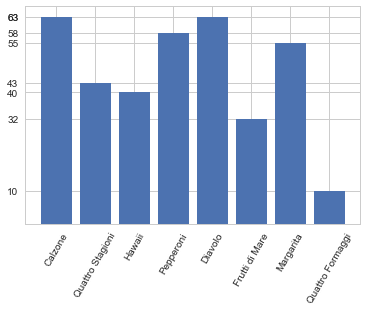

In [10]:
import numpy as np

x = np.arange(len(counts))
print(x)
plt.bar(x, votes)
plt.xticks(x, names, rotation=60)
plt.yticks(votes)

**Exercise:** Can you add a Y-axis label to the chart? Have a look [here](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel) for pointers.

[0 1 2 3 4 5 6 7]


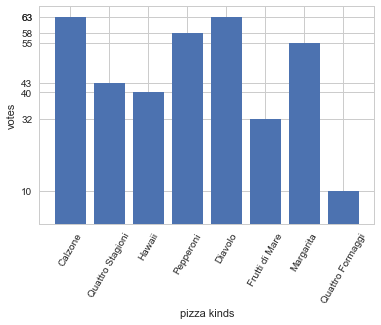

In [13]:
# YOUR CODE HERE


**Example 3: Bar chart** Both the Bar and the Column charts display data using rectangular bars where the length of the bar is proportional to the data value. Both are used to compare two or more values. However, their difference lies in their orientation. A Bar chart is oriented horizontally whereas the Column chart is oriented vertically. See [this blog](https://www.fusioncharts.com/blog/bar-charts-or-column-charts/) for a discussion on when to use bar and when to use column charts.

Here is how to plot a bar chart (yes, very similar to a column chart):

[0 1 2 3 4 5 6 7]


([<matplotlib.axis.YTick at 0x115e33d68>,
 <a list of 8 Text yticklabel objects>)

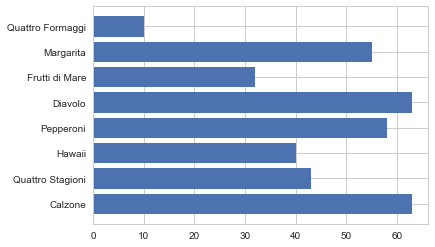

In [14]:
x = np.arange(len(counts))
print(x)
plt.barh(x, votes)
plt.yticks(x, names, rotation=0)
#plt.xticks(votes)

**Example 4: Plotting from a pandas Dataframe**

In [9]:
import pandas as pd

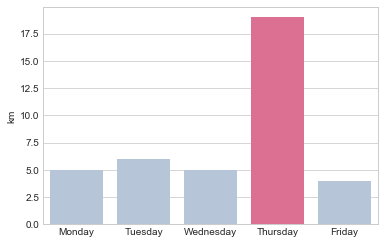

In [10]:
# We want to visualize how far I've walked this week (using some random numbers).
# Here's a dictionary that can be loaded as a pandas dataframe. Each item corresponds to a COLUMN.
distance_walked = {'days': ['Monday','Tuesday','Wednesday','Thursday','Friday'],
                   'km': [5,6,5,19,4]}

# Turn it into a dataframe.
df = pd.DataFrame.from_dict(distance_walked)

# Plot the data using seaborn's built-in barplot function.
# To select the color, I used the color chart from here: 
# http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
ax = sns.barplot(x='days',y='km',color='lightsteelblue',data=df)

# Here's a first customization. 
# Using the Matplotlib object returned by the plotting function, we can change the X- and Y-labels.
ax.set_ylabel('km')
ax.set_xlabel('')

# Each matplotlib object consists of lines and patches that you can modify.
# Each bar is a rectangle that you can access through the list of patches.
# To make Thursday stand out even more, I changed its face color.
ax.patches[3].set_facecolor('palevioletred')

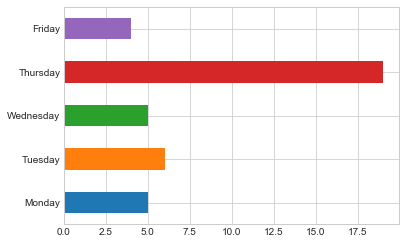

In [11]:
# You can also plot a similar chart by directly using Pandas.
ax = df.plot(x='days',y='km',kind='barh') # or kind='bar'

# Remove the Y label and the legend.
ax.set_ylabel('')
ax.legend('')

**Note on bar/column plots:** while they're super useful, don't use them to visualize distributions. There was even a [Kickstarter](https://www.kickstarter.com/projects/1474588473/barbarplots) to raise money for sending T-shirts with a meme image to the editorial boards of big journals!

## 3. Correlation

Let's look at correlation between values in Python. We'll explore two measures: Pearson and Spearman correlation. Given two lists of numbers, Pearson looks whether there is any *linear relation* between those numbers. This is contrasted by the Spearman measure, which aims to see whether there is any *monotonic relation*. The difference between linear and monotonic is that the latter is typically less strict:

* Monotonic: a constant relation between two lists of numbers.
    1. if a number in one list increases, so does the number in the other list, or 
    2. if a number in one list increases, the number in the other list decreases.
* Linear: similar to monotonic, but the increase or decrease can be modeled by a straight line.

Here is a small example to illustrate the difference.

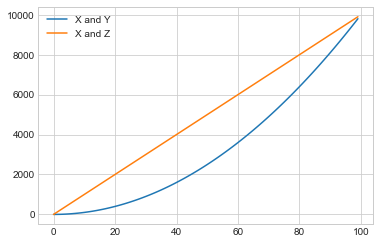

In [12]:
# Scipy offers many statistical functions, among which the Pearson and Spearman correlation measures.
from scipy.stats import pearsonr, spearmanr

# X is equal to [1,2,3,...,99,100]
x = list(range(100))

# Y is equal to [1^2, 2^2, 3^2, ..., 99^2, 100^2]
y = [i**2 for i in x]

# Z is equal to [100,200,300, ..., 9900, 10000]
z = [i*100 for i in x]

# Plot x and y.
plt.plot(x, y, label="X and Y")

# Plot y and z in the same plot.
plt.plot(x, z, label="X and Z")

# Add a legend.
plt.legend(loc='upper left')

In [13]:
correlation, significance = pearsonr(x,y)
print('The Pearson correlation between X and Y is:', correlation)

correlation, significance = spearmanr(x,y)
print('The Spearman correlation between X and Y is:', correlation)

print('----------------------------------------------------------')

correlation, significance = pearsonr(x,z)
print('The Pearson correlation between X and Z is:', correlation)

correlation, significance = spearmanr(x,z)
print('The Spearman correlation between X and Z is:', correlation)

The Pearson correlation between X and Y is: 0.967644392713
The Spearman correlation between X and Y is: 1.0
----------------------------------------------------------
The Pearson correlation between X and Z is: 1.0
The Spearman correlation between X and Z is: 1.0


The Spearman correlation is perfect in both cases, because with each increase in X, there is an increase in Y. But because that increase isn't the same at each step, we see that the Pearson correlation is slightly lower.

In Natural Language Processing, people typically use the Spearman correlation because they are interested in *relative scores*: does the model score A higher than B? The exact score often doesn't matter. Hence Spearman provides a better measure, because it doesn't penalize models for non-linear behavior.

## 4. Putting it all together: Exploratory visualization and analysis

Before you start working on a particular dataset, it's often a good idea to explore the data first. If you have text data; open the file and see what it looks like. If you have numeric data, it's a good idea to visualize what's going on. This section shows you some ways to do exactly that, on two datasets. 

### 4.1. A dataset with sentiment scores

Here is a histogram plot of sentiment scores for English (from [Dodds et al. 2014](http://www.uvm.edu/storylab/share/papers/dodds2014a/)), where native speakers rated a list of 10,022 words on a scale from 0 (negative) to 9 (positive).

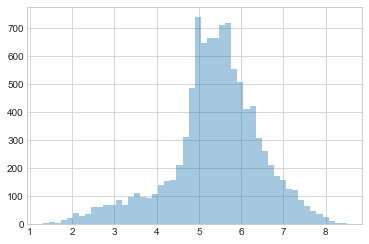

In [23]:
# Load the data (one score per line, words are in a separate file).
with open('../Data/Dodds2014/data/labMTscores-english.csv') as f:
    scores = [float(line.strip()) for line in f]

# Plot the histogram
sns.distplot(scores, kde=False)

Because Dodds et al. collected data from several languages, we can plot the distributions for multiple languages and see whether they all have normally distributed scores. We will do this with a [Kernal Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) plot. Basically, such a plot shows you the probability distribution (the chance of getting a particular score) as a continuous line. Because it's a line rather than a set of bars, you can show many of them in the same graph.

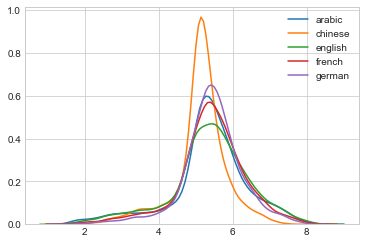

In [15]:
# This is necessary to get all the separate files.
import glob

# Get all the score files.
filenames = glob.glob('../Data/Dodds2014/data/labMTscores-*.csv')

# Showing the first 5, because else you can't keep track of all the lines.
for filename in filenames[:5]:
    # Read the language from the filename
    language = filename.split('-')[1]
    language = language.split('.')[0]
    with open(filename) as f:
        scores = [float(line.strip()) for line in f]
        scores_array = np.array(scores) # This is necessary because the kdeplot function only accepts arrays.
        sns.kdeplot(scores_array, label=language)

plt.legend()

Look at all those unimodal distributions (with a single peak)!

### 4.2. A concreteness dataset

We'll work with another data file by Brysbaert and colleagues, consisting of concreteness ratings. I.e. how abstract or concrete participants think a given word is.

In [16]:
import csv
# Let's load the data first.
concreteness_entries = []
with open('../Data/concreteness/Concreteness_ratings_Brysbaert_et_al_BRM.txt') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for entry in reader:
        entry['Conc.M'] = float(entry['Conc.M'])
        concreteness_entries.append(entry)

For any kind of ratings, you can typically expect the data to have a normal-ish distribution: most of the data in the middle, and increasingly fewer scores on the extreme ends of the scale. We can check whether the data matches our expectation using a histogram.

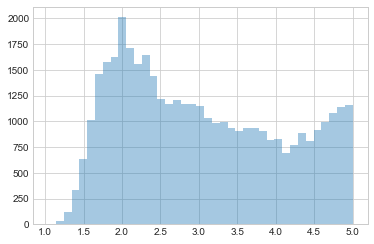

In [17]:
scores = []
for entry in concreteness_entries:
    scores.append(entry['Conc.M'])

# Plot the distribution of the scores.
sns.distplot(scores, kde=False)

.

.

.

.

Surprise! It doesn't. This is a typical *bimodal* distribution with two peaks. Going back to [the original article](http://link.springer.com/sharelink/10.3758/s13428-013-0403-5), this is also mentioned in their discussion:

> One concern, for instance, is that concreteness and abstractness may be not the two extremes of a quantitative continuum (reflecting the degree of sensory involvement, the degree to which words meanings are experience based, or the degree of contextual availability), but two qualitatively different characteristics. One argument for this view is that the distribution of concreteness ratings is bimodal, with separate peaks for concrete and abstract words, whereas ratings on a single, quantitative dimension usually are unimodal, with the majority of observations in the middle (Della Rosa et al., 2010; Ghio, Vaghi, & Tettamanti, 2013).

It is commonly known in the literature on concreteness that concreteness ratings are (negatively) correlated with word length: the longer a word, the more abstract it typically is. Let's try to visualize this relation. We can plot the data using a regression plot to verify this. In addition, we're using a Pandas DataFrame to plot the data. You could also just use `sns.regplot(word_length, rating, x_jitter=0.4)`.

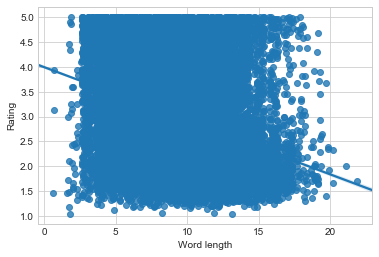

In [26]:
# Create two lists of scores to correlate.
word_length = []
rating = []
for entry in concreteness_entries:
    word_length.append(len(entry['Word']))
    rating.append(entry['Conc.M'])

# Create a Pandas Dataframe. 
# I am using this here, because Seaborn adds text to the axes if you use DataFrames.
# You could also use pd.read_csv(filename,delimiter='\t') if you have a file ready to plot.
df = pd.DataFrame.from_dict({"Word length": word_length, "Rating": rating})

# Plot a regression line and (by default) the scatterplot. 
# We're adding some jitter because all the points fall on one line. 
# This makes it difficult to see how densely 'populated' the area is.
# But with some random noise added to the scatterplot, you can see more clearly 
# where there are many dots and where there are fewer dots.
sns.regplot('Word length', 'Rating', data=df, x_jitter=0.4)

That doesn't look like a super strong correlation. We can check by using the correlation measures from SciPy.

In [19]:
# If we're interested in predicting the actual rating.
corr, sig = pearsonr(word_length, rating)
print('Correlation, according to Pearsonr:', corr)

# If we're interested in ranking the words by their concreteness.
corr, sig = spearmanr(word_length, rating)
print('Correlation, according to Spearmanr:', corr)

# Because word length is bound to result in ties (many words have the same length), 
# some people argue you should use Kendall's Tau instead of Spearman's R:
from scipy.stats import kendalltau

corr, sig = kendalltau(word_length, rating)
print("Correlation, according to Kendall's Tau:", corr)

Correlation, according to Pearsonr: -0.292494101436
Correlation, according to Spearmanr: -0.313193645989
Correlation, according to Kendall's Tau: -0.224706642225


## 5. Take home message: The steps of visualization

Now you've seen several different plots, hopefully the general pattern is becoming clear: visualization typically consists of three steps:

1. Load the data.
2. Organize the data in such a way that you can feed it to the visualization function.
3. Plot the data using the function of your choice.

There's also an optional **fourth step**: After plotting the data, tweak the plot until you're satisfied. Of these steps, the second and fourth are usually the most involved.

## 6. Optional: On your own

If you would like to practice, here is an exercise with data from Donald Trump's Facebook page. The relevant file is `Data/Trump-Facebook/FacebookStatuses.tsv`. Try to create a visualization that answers one of the following questions:

1. How does the number of responses to Trump's posts change over time?
2. What webpages does Donald Trump link to, and does this change over time? Which is the most popular? Are there any recent newcomers?
3. What entities does Trump talk about?
4. Starting March 2016 (when the emotional responses were introduced on Facebook), how have the emotional responses to Trumps messages developed?
5. [Question of your own.]

Try to at least think about what kind of visualization might be suitable to answer these questions, and we'll discuss this question in class on Monday. More specific questions:

* What kind of preprocessing is necessary before you can start visualizing the data?
* What kind of visualization is suitable for answering these questions?
    - What sort of chart would you choose?
    - How could you use color to improve your visualization?
* What might be difficult about visualizing this data? How could you overcome those difficulties?

In [20]:
# Open the data.


# Process the data so that it can be visualized.



In [21]:
# Plot the data.


# Modify the plot.

